In [1]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data = sm.datasets.co2.load_pandas()
y = data.data

In [3]:
print(y)

            co2
19580329  316.1
19580405  317.3
19580412  317.6
19580419  317.5
19580426  316.4
19580503  316.9
19580510    NaN
19580517  317.5
19580524  317.9
19580531    NaN
19580607    NaN
19580614    NaN
19580621    NaN
19580628    NaN
19580705  315.8
19580712  315.8
19580719  315.4
19580726  315.5
19580802  315.6
19580809  315.1
19580816  315.0
19580823    NaN
19580830  314.1
19580906  313.5
19580913    NaN
19580920    NaN
19580927    NaN
19581004    NaN
19581011    NaN
19581018    NaN
...         ...
20010609  373.1
20010616  372.8
20010623  372.9
20010630  372.7
20010707  372.1
20010714  371.3
20010721  371.2
20010728  370.6
20010804  369.9
20010811  369.5
20010818  369.3
20010825  369.0
20010901  368.4
20010908  368.2
20010915  368.0
20010922  367.4
20010929  367.4
20011006  367.8
20011013  367.6
20011020  368.1
20011027  368.7
20011103  368.7
20011110  368.8
20011117  369.7
20011124  370.3
20011201  370.3
20011208  370.8
20011215  371.2
20011222  371.3
20011229  371.5

[2284 r

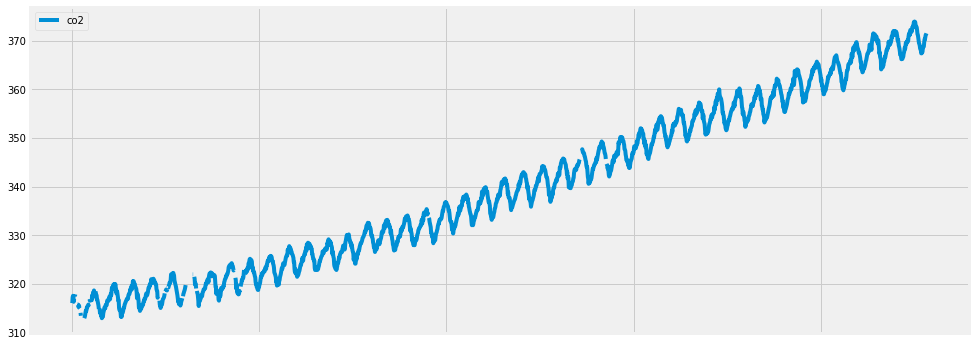

In [4]:
y.plot(figsize=(15, 6))
plt.show()

In [7]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [9]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:32248.136690633324
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:29268.241117349367
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:11095.514321947061
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:10571.718882851967
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:11077.245727603324
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:10076.186363476425
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:11023.775971419582
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:10525.366440987715
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:29241.2903003167
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:26246.70179162667
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:8556.829036038273
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:8051.033277562572
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:11168.612999090932
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:8754.329078377134
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:8490.230783907955
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:8009.418063376473
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3202.9344347979695
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3202.5120931181036


In [10]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8948      0.022     40.469      0.000       0.851       0.938
ma.L1         -1.3255      0.059    -22.375      0.000      -1.442      -1.209
ar.S.L12      -0.0011      0.001     -1.049      0.294      -0.003       0.001
ma.S.L12      -1.0000      8.516     -0.117      0.907     -17.692      15.692
sigma2         0.1256      1.071      0.117      0.907      -1.973       2.225


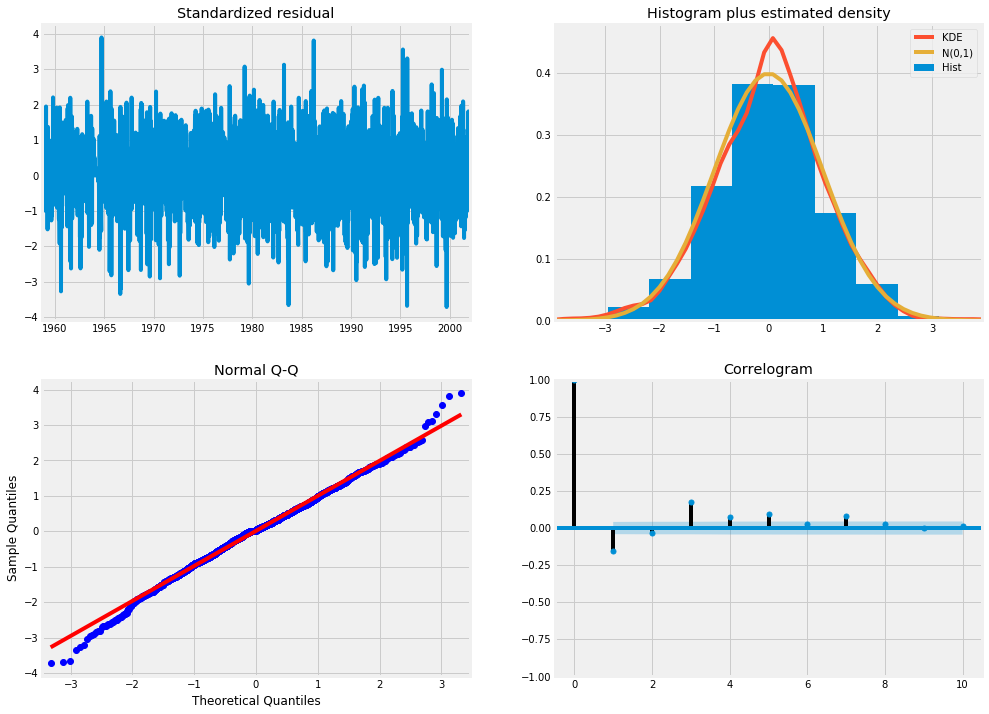

In [11]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [13]:
pred = results.get_prediction(start=pd.to_datetime('1996-01-01'), dynamic=False)
pred_ci = pred.conf_int()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
ax = y['1990':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('1998-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [ ]:
ax = y['1990':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('1998-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [ ]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['1998-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=500)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [ ]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()